In [1]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import random as rd
import numpy as np
import time
from typing import List
import timeit

device = "cuda"
dtype = torch.float64
puntosCreados = []
class NeuralNetworkPrueba(nn.Module):
    def __init__(self):
        super(NeuralNetworkPrueba, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1, 50),
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 1)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

redDinamica = NeuralNetworkPrueba().to(device)



['senoParaleloFinales.tar']


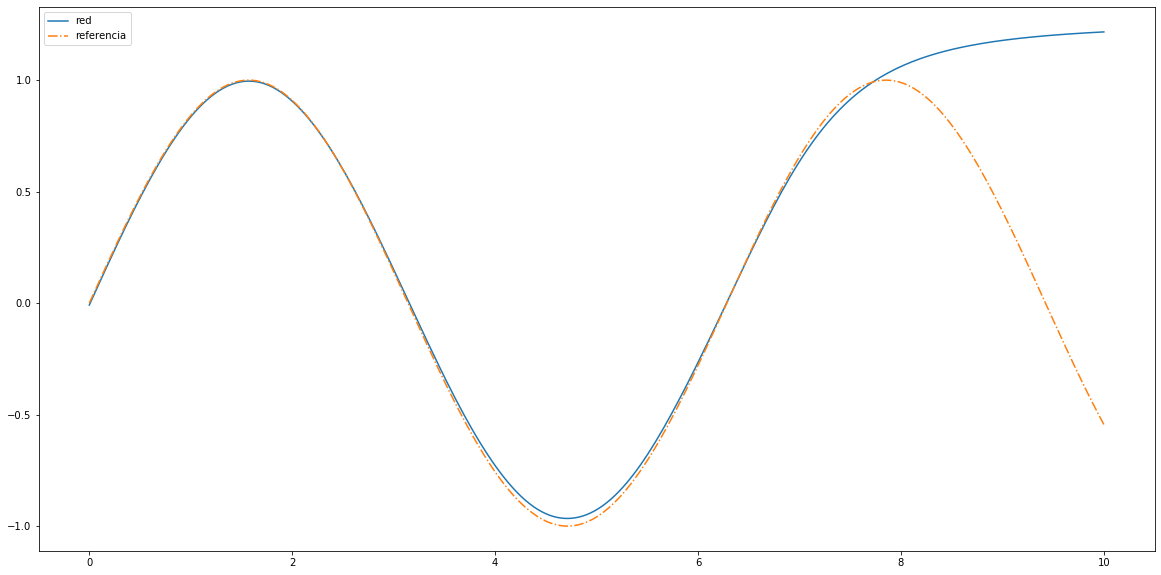

In [2]:
os.chdir("/home/UANDES/n.grandas/pythontesis/pythontesis/v3")
archivos = [archivito for archivito in os.listdir() if archivito[-3:]=="tar"  ]
print(archivos)
plt.figure(figsize = (20,10))
for nombre in archivos:
    redDinamica.load_state_dict(torch.load(nombre))
    ygrafica = []
    puntosGrafica = torch.linspace(0,10,250)
    for i in puntosGrafica:
        ytemp=redDinamica(torch.tensor([i],device = device))
        ygrafica.append(ytemp.cpu().detach().numpy()[0])
        #ygrafica.append(ytemp.detach().numpy()[0])
    import numpy as np
    puntosGrafica = np.linspace(0,10,250)
    plt.plot(puntosGrafica,ygrafica,label = "red")
plt.plot(puntosGrafica,np.sin(puntosGrafica),label = "referencia",LineStyle="-.")
plt.legend()

In [3]:
import pickle
import os
os.chdir("/home/UANDES/n.grandas/pythontesis/pythontesis/v3/RESULTADOS/registrosPerdidas")
archivo = open("registro.tesis","rb")
for i in range(100):
    try:
        print(pickle.load(archivo))
    except:
        break
archivo.close()

In [4]:
import pickle
import os
os.chdir("/home/UANDES/n.grandas/pythontesis/pythontesis/v4/RESULTADOS/registrosPerdidas")
archivo = open("registro.tesis","rb")
for i in range(100):
    try:
        print(pickle.load(archivo))
    except:
        break
archivo.close()

rata de aprendizaje
0.01
[16.295331682477677, 17.82548323921535, 4.431954956054687, 3.0743382771809897, 2.9224945594524514, 2.8050775835590978, 2.584632642341383, 2.447271728515625, 2.2957015166411527, 2.1635667849809694, 2.22928637993045, 1.9022270025208938, 1.8673038058810765, 1.7482773801113696, 1.6525609541912467, 1.6734442617378982, 1.4979812334168632, 1.4119952115145598, 1.4522830896210253, 1.3048716399629237, 1.1672764762503203, 1.272035629030258, 1.8716449444110577, 1.2235010631048857, 1.4374614107436028, 1.1542472302074163, 1.0280279917259738, 0.8168944803873698, 1.2662270285866477, 0.9455949807468849, 0.5955495481137876, 0.3315409005406391, 0.36009909685920266, 0.1462848707177173, 0.3386470066027695, 0.32084087749103923, 0.18102305422547044, 0.0636584482694927, 0.37813418673485827, 0.2315848379424124, 0.08564387217606648, 0.028903632488065552, 0.16291587466285343, 0.1082925439995026, 0.044241883339138206, 0.015886771786320315, 0.0061592586272585705, 0.0025811923586803935]
ter

In [5]:
import pickle
import os
os.chdir("/home/UANDES/n.grandas/pythontesis/pythontesis/v4/RESULTADOS/registrosPerdidas")

lecturaDeTiempo = True
class convergencia1():
    def __init__(self,archivo):
        self.rata: float = 0
        self.tiempo: float = -1
        self.perdidas = []
        self.generador(archivo)
    def lectura(self,archivo):
        try:
            leido = pickle.load(archivo)
        except Exception as e:
            if e.args==('Ran out of input',):
                raise Exception("ya no hay nada mas que leer indicado por pickle")
        return leido
    def generador(self,archivo):
        global lecturaDeTiempo
        if not lecturaDeTiempo:
            self.rata = self.lectura(archivo)
        elif self.lectura(archivo) == "rata de aprendizaje":
            self.rata = self.lectura(archivo)
        else:
            raise Exception("Se putio el orden de lectura")
        self.perdidas = self.lectura(archivo)
        if self.lectura(archivo) == "termino en":
            self.tiempo = self.lectura(archivo)
            lecturaDeTiempo = True
        else:
            lecturaDeTiempo = False



archivo = open("registro.tesis","rb")
convergencias1 = []
while True:
    try:
        objetoTemporal = convergencia1(archivo)
        convergencias1.append(objetoTemporal)
    except Exception as e:
        print (e.args)
        print (e.__traceback__)
        break
archivo.close()

('ya no hay nada mas que leer indicado por pickle',)


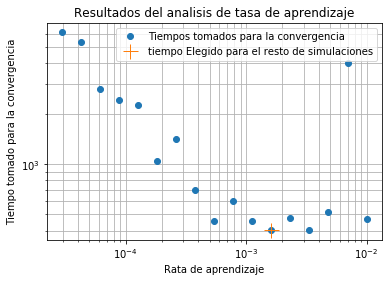

In [11]:
ratasDeConvergencia1 = [simulacion.rata for simulacion in convergencias1 if simulacion.tiempo != -1]
tiemposDeConvergencia1 = [simulacion.tiempo for simulacion in convergencias1 if simulacion.tiempo != -1]

eleccion = np.argmin(tiemposDeConvergencia1)

plt.loglog(ratasDeConvergencia1,tiemposDeConvergencia1,marker = "o",ms = 6,linewidth = 0,label = "Tiempos tomados para la convergencia")
plt.loglog(ratasDeConvergencia1[eleccion],tiemposDeConvergencia1[eleccion],marker = "+",ms=15,label = "tiempo Elegido para el resto de simulaciones",linewidth = 0)
plt.title("Resultados del analisis de tasa de aprendizaje")
plt.grid(True,"both")
plt.legend()
plt.ylabel("Tiempo tomado para la convergencia")
plt.xlabel("Rata de aprendizaje")
plt.show()


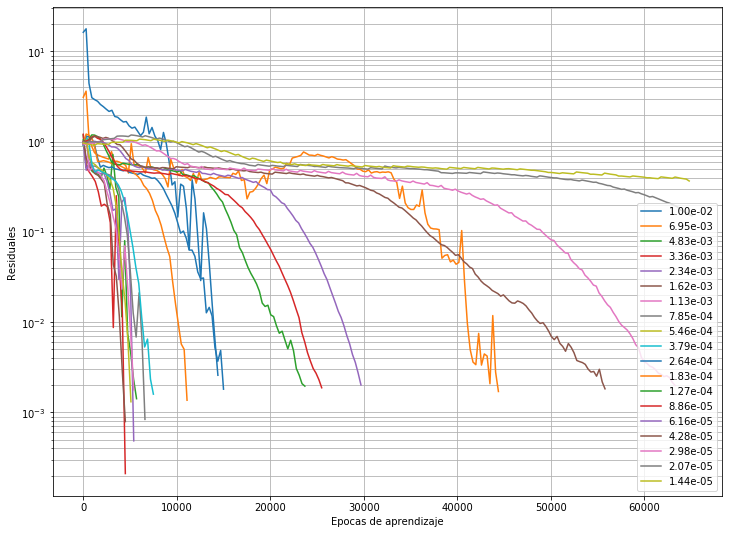

In [20]:
plt.figure(figsize = (12,9))
for convergencia in convergencias1:
    reg = convergencia.perdidas
    ejeX = np.linspace(0,len(reg)*300,len(reg))
    label = "{:.2e}".format(convergencia.rata)
    plt.semilogy(ejeX,reg,label=label)
plt.legend()
plt.ylabel("Residuales")
plt.xlabel("Epocas de aprendizaje")
plt.grid(True,"both")

In [21]:
plt.figure(figsize = (12,9))
plt.title ("Movimiento del promedio vs las epocas ")

<Figure size 648x864 with 0 Axes>

<Figure size 648x864 with 0 Axes>